#자동차 가격 예측 AI 대회(Dacon Data set)


자동차 관련 데이터를 분석하여 시장 가격 동향을 파악하고,

예측 결과를 기반으로 비즈니스 전략을 수립하는 데 도움이 될 것입니다.

다른 사람들과 인사이트를 겨루며 알고리즘 대회의 즐거움을 느껴 보세요.



[주제]
자동차 가격을 예측하는 AI 알고리즘 개발



[설명]
자동차 생산년도, 브랜드, 종류 등 자동차와 관련된 데이터를 활용하여 자동차 가격을 예측하는 AI 모델을 개발해야 합니다.



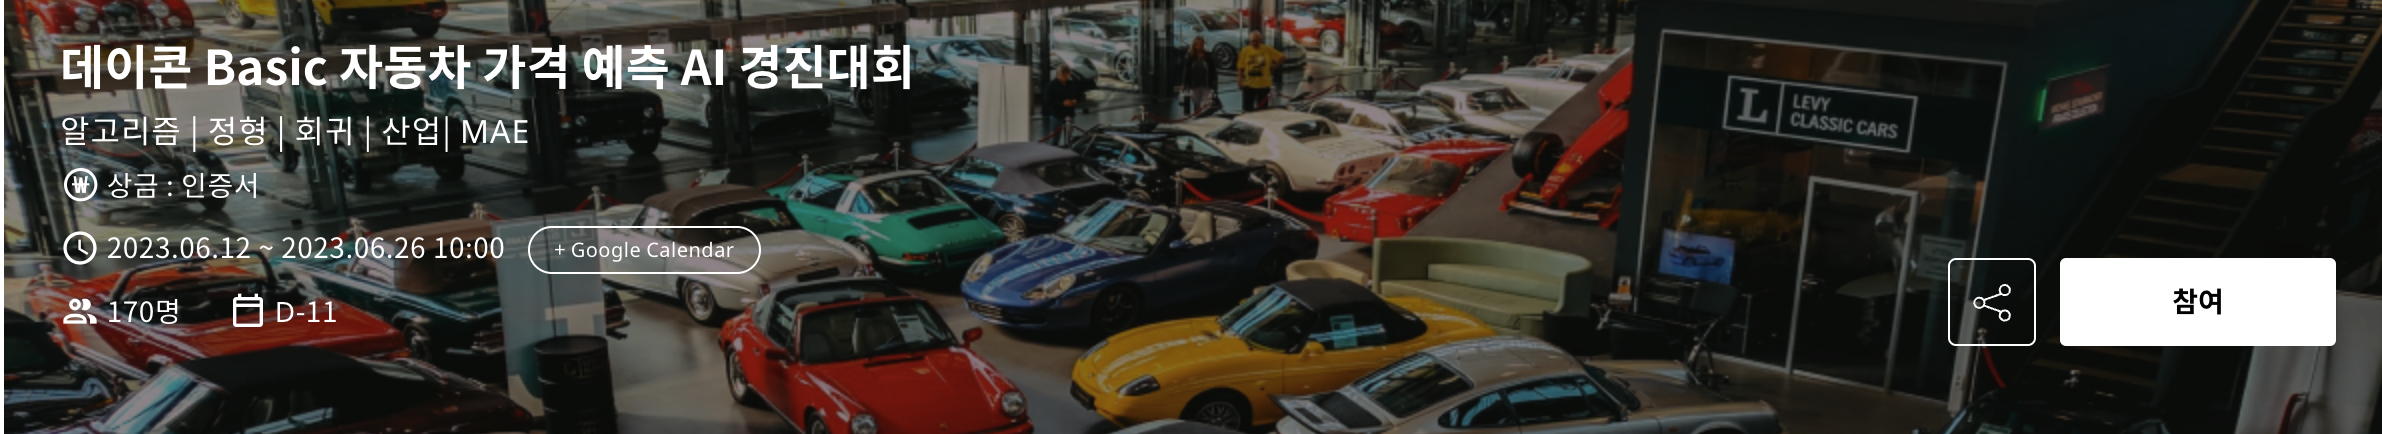

# import / 라이브러리 호출

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown https://drive.google.com/uc?id=1fxBwIHQsnXxkVNjjjWBEb8m0KLxxPAqd #train 파일
!gdown https://drive.google.com/uc?id=1mvy0AVoYa7mxykXEJbhnsUFSuSBbNuQ9 #test 파일

Downloading...
From: https://drive.google.com/uc?id=1fxBwIHQsnXxkVNjjjWBEb8m0KLxxPAqd
To: /content/train.csv
100% 4.07M/4.07M [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mvy0AVoYa7mxykXEJbhnsUFSuSBbNuQ9
To: /content/test.csv
100% 919k/919k [00:00<00:00, 124MB/s]


**AI 데이터의 특징**
train / test 파일로 구분되어있음.
train 에는 학습할 데이터가 있으며 그 학습데이터의 정답이 같이 있다
test 에는 예측을 해야하는 값들이 들어있다.


##### <font color=green> **[문제0] 라이브러리 pandas는 pd로, seaborn 은 sns로 matplot은 plt로 별칭을 사용하여 각각 import 하시오** </font>

# Data Load / 데이터 불러오기


##### <font color=green> **[문제1] train 이라는 변수에 데이터를 load 하세요. 그리고 데이터프레임 상위5줄을 출력하세요** </font>

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


# Data Summary / 데이터 요약
데이터의 전체 양상을 확인합니다.

데이터의 수, 결측치 여부를 살펴보고 기술통계량을 확인합니다.


##### <font color=green> **[문제2] train 데이터의 자료구조를 파악하는 명령어를 입력하세요** </font>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [ ]:
# 기술통계량을 확인하는 코드입니다.
train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


# 결측치 확인 작업



##### <font color=green> **[문제3] train 의 NAN값을 확인하세요.** </font>

In [ ]:
#NAN 값이 있다면 꼭 외워야하는 명령어 dropna() , fillna()
#변수에 저장 해서 하는 방법
#train = train.dropna() nan값이 있는 행을 모두 제거
#train = train.fillna(0) nan값을 0으로 채운다
#데이터프레임 원본에 바로 적용방법 inplace
#train.dropna(inplace=True) nan값이 있는 행을 모두 제거
#train.fillna(inplace=True) nan값을 0으로 채운다

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB



##### <font color=green> **[문제3] train 의 컬럼별 NAN값을 출력하세요.** </font>

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

####  실제 문제처럼 가정을 하겠습니다.(이 데이터에는 결측치가 없어서 있다고 가정하겠습니다.)
- 현재 '주행거리' 컬럼에 결측치가 3000여개의 NAN값이 존재한다고 가정합니다.
##### <font color=green> **[문제4] train 데이터프레임에서 nan값이 제일 많은 컬럼은 삭제하세요.** </font>

##### <font color=green> **[**문제4-2**] train2에서 float 타입의 결측치 데이터를 0으로 변환하세요.** </font>

train2에 train 을 저장할당합니다.

In [ ]:
train2 = train

In [ ]:
train2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 57920 entries, 0 to 57919
Series name: 가격
Non-Null Count  Dtype  
--------------  -----  
57920 non-null  float64
dtypes: float64(1)
memory usage: 452.6 KB


KeyError: ignored

##### <font color=green> **[문제4-3] 해당 전처리가 반영된 train2는 train3이라는 데이터프레임 변수에 저장해주세요** </font>

# Visualization / 시각화
데이터에 대한 이해를 위해 시각화를 수행합니다.

### 종속변수 시각화
종속변수에 대한 분포를 확인하기 위해 가격 컬럼(column) 데이터를 시각화 합니다.

####
##### <font color=green> **[문제5] mataplotlib 라이브러리를 활용하여 train 의 '가격' 컬럼의 분포를 확인하는 Histogram 그래프를 만드세요** </font>

https://wikidocs.net/92112

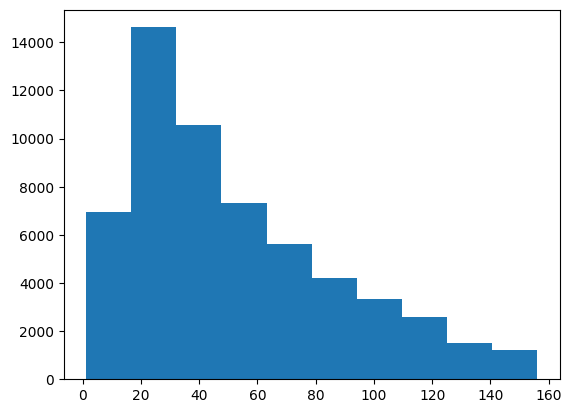

####
##### <font color=green> **[문제5-2] seaborn 라이브러리를 활용하여 train 의 '가격' 컬럼을 displot 을 활용하여시각화하세요 .** </font>

https://junstar92.tistory.com/90
https://seaborn.pydata.org/generated/seaborn.displot.html

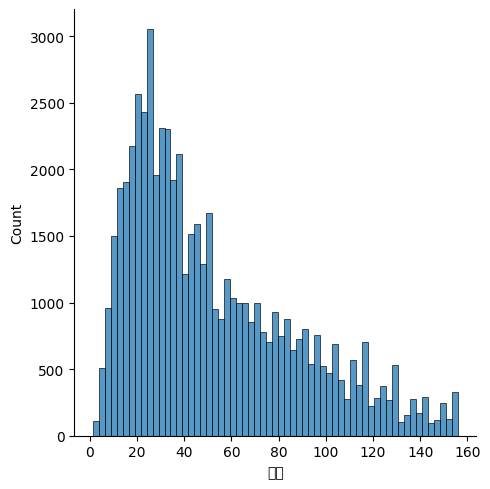

### 생산년도별 평균 가격 시각화


##### <font color=green> **[문제5-3] matasploit의 barplot을 활용하여 x축은 '생산년도' 컬럼을 y축은 '가격' 컬럼을 작성하세요 figsize는 (16,10)** </font>

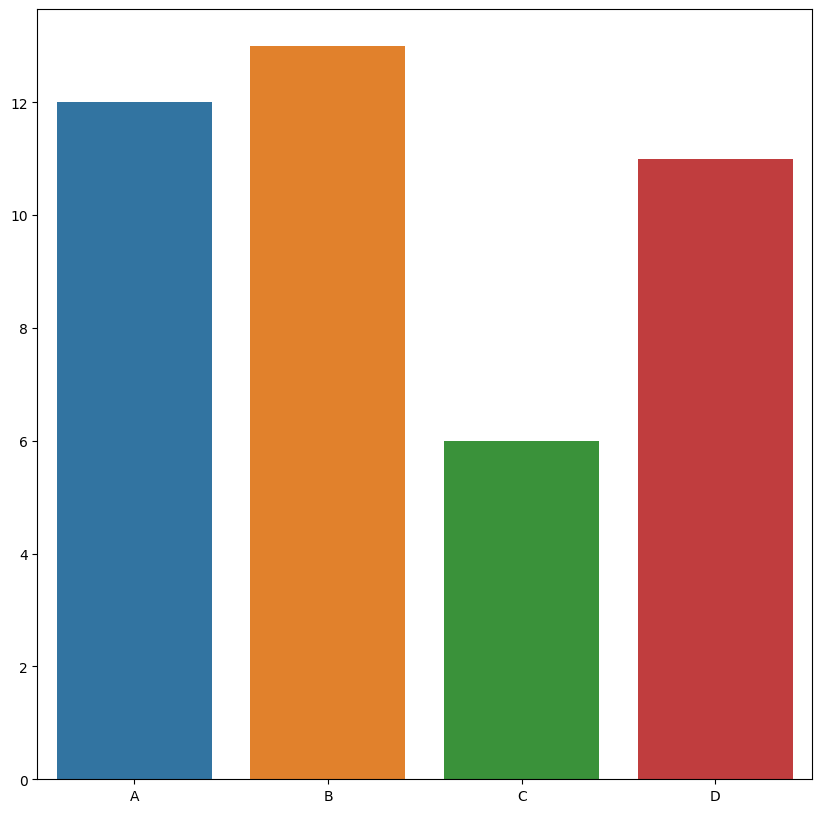

In [ ]:
#####참고######
import seaborn as sns

plt.figure(figsize= (10,10))
x = ['A', 'B', 'C', 'D'] ## x축에 들어갈 범주형 변수
y = [12, 13, 6, 11] ## 각 범주에 해당하는 숫자
sns.barplot(x=x, y=y) ## 바 차트 생성
plt.show()

#####참고#####

plt.xticks(rotation=80) 부가기능 겹치는글자를 rotation 하여 시각화

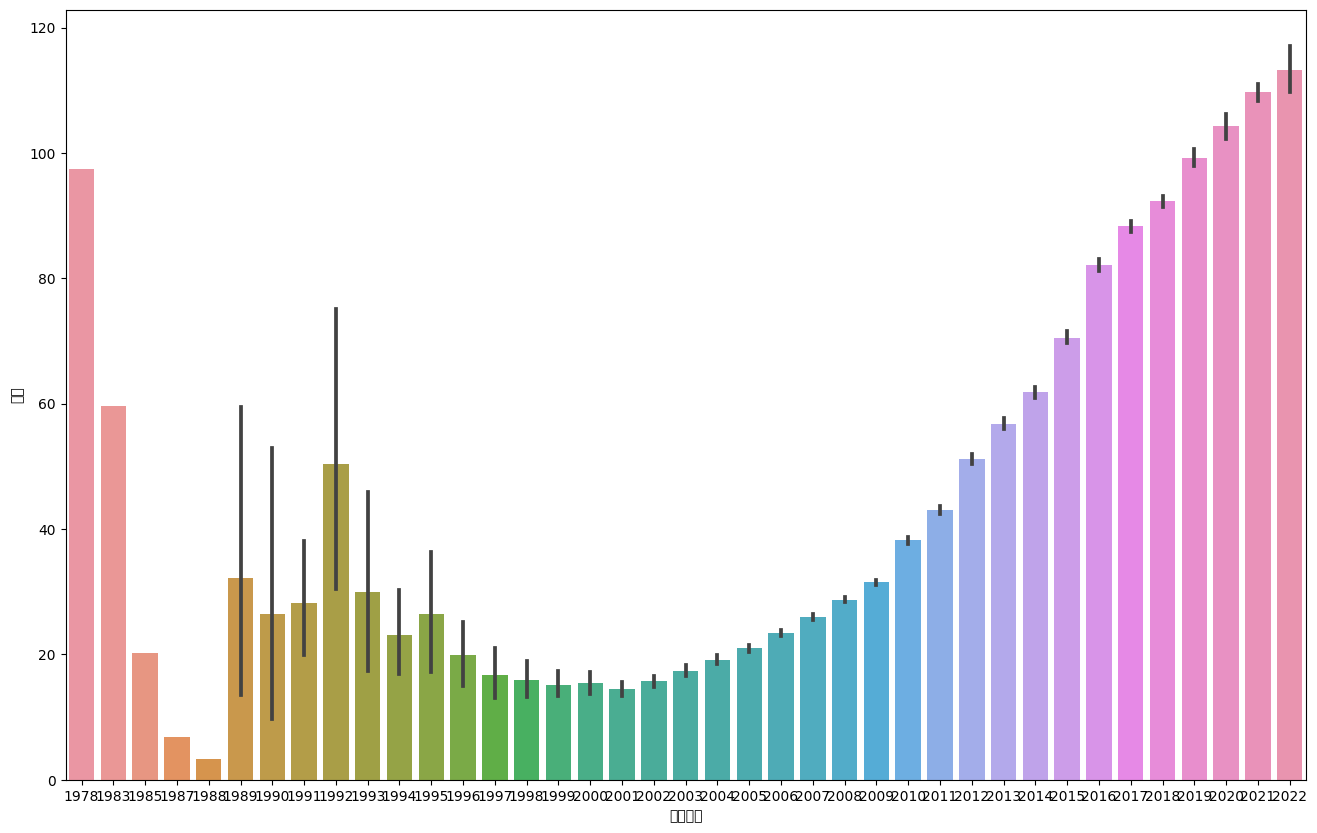

# 상관계수 확인
feature간의 상관관계를 확인함으로써 종속변수와 연관성이 높은 변수, 다중공선성이 일어날 수 있는 변수를 확인할 수 있습니다.

<font color=orange>**상관계수는 두 변수 간의 관계 강도와 방향성을 측정하는 통계적 지표입니다. 상관계수는 -1부터 1까지의 범위를 가지며, 다음과 같은 의미를 갖습니다:**
</font>
- 1에 가까울수록 양의 상관관계가 강합니다. 즉, 한 변수의 증가에 따라 다른 변수도 증가하는 경향이 있습니다.
-1에 가까울수록 음의 상관관계가 강합니다. 즉, 한 변수의 증가에 따라 다른 변수는 감소하는 경향이 있습니다.
- 0에 가까울수록 두 변수 사이에는 선형적인 상관관계가 거의 없습니다.

##### <font color=green> **[문제6] 각 항목별 데이터간 상관관계를 확인하려한다. Pearson 상관계수를 구하여 heatmap 에 표시하시오**
- figsize를 (20,16)로 설정하세요
- annotation을 포함하세요
- 문제에 주어진 내용만 입력하고 다른 파라미터는 입력하지 마세요</font>

https://blog.naver.com/PostView.nhn?blogId=kiddwannabe&logNo=221205309816

In [ ]:
train.corr() #상관 계수 확인 컬럼별끼리 얼마나 상관관계가 있는지를 보는 지표
# 나중에 머신러닝을 deep 하게 들어가면 이 상간관계를 토대로 '피처엔지니어링' 을 한다.
# 곱하고 더하고 로그취하고 제곱하고 등등 다양한방법을 활용하여 데이터전처리를 하는데 AICE 시험에는 나올 확률이 적다(피처엔지니어링)

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
생산년도,1.000000,0.899230,-0.633617,-0.311761,0.000008,0.062398,-0.033641,0.104627,-0.117383,0.754252
모델출시년도,0.899230,1.000000,-0.576276,-0.285319,-0.001379,0.052318,-0.027458,0.108243,-0.109941,0.706173
주행거리,-0.633617,-0.576276,1.000000,0.390262,0.006850,0.341444,-0.365048,-0.086310,0.105766,-0.519335
배기량,-0.311761,-0.285319,0.390262,1.000000,-0.010587,0.253841,-0.265280,0.003432,0.033152,0.121222
압축천연가스(CNG),0.000008,-0.001379,0.006850,-0.010587,1.000000,-0.018917,-0.022797,-0.002242,-0.004831,-0.008791
경유,0.062398,0.052318,0.341444,0.253841,-0.018917,1.000000,-0.891617,-0.087706,-0.188940,0.087424
가솔린,-0.033641,-0.027458,-0.365048,-0.265280,-0.022797,-0.891617,1.000000,-0.105696,-0.227694,-0.065623
하이브리드,0.104627,0.108243,-0.086310,0.003432,-0.002242,-0.087706,-0.105696,1.000000,-0.022398,0.132432
액화석유가스(LPG),-0.117383,-0.109941,0.105766,0.033152,-0.004831,-0.188940,-0.227694,-0.022398,1.000000,-0.112631
가격,0.754252,0.706173,-0.519335,0.121222,-0.008791,0.087424,-0.065623,0.132432,-0.112631,1.000000


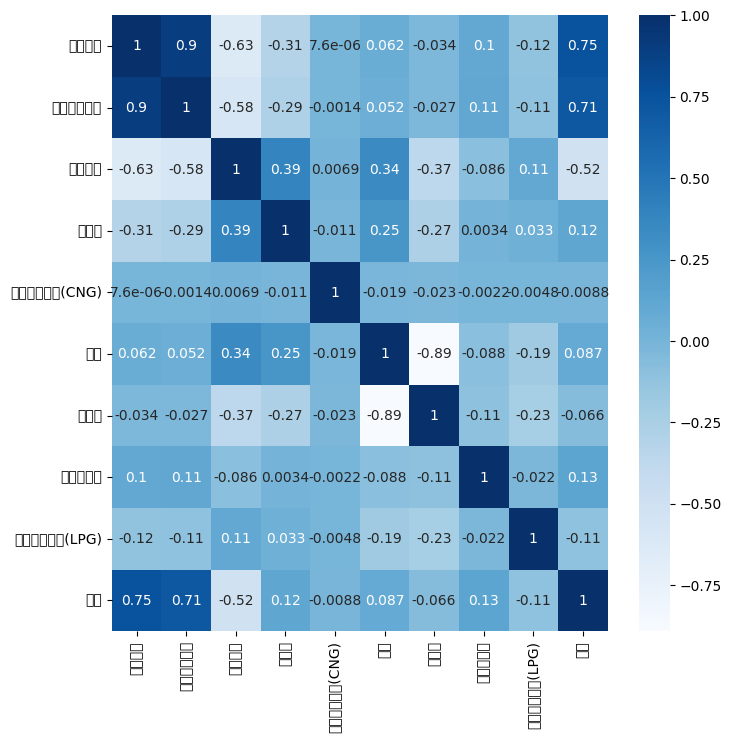

# 불필요한 컬럼 제거


##### <font color=green> **[문제6] 데이터프레임 train 에서 'ID','가격' 컬럼을 제거하고 train_x에 저장하고 , train_y에는 '가격'컬럼의 값만 저장시켜 학습데이터셋을 구축하세요.** </font>


##### <font color=green> **[문제6-1] test_x 변수에 불필요한 'ID'컬럼을 제거하고 train 학습 데이터와 피처의 형태가 같게 만들어주세요.** </font>

In [ ]:
test = pd.read_csv('test.csv')
test.head()

In [ ]:
#train 출력
train_X

In [ ]:
#test 출력
test_x

#다음수업 예고
###라벨 encoder 와 one hot vector 를 활용한 카테고리형 데이터를 수치형 데이터로 바꾸는 작업

In [ ]:
ordinal_features = ['브랜드', '차량모델명', '판매도시', '판매구역']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train_x[feature])
    train_x[feature] = le.transform(train_x[feature])

    # train데이터에서 존재하지 않았던 값이 test 데이터에 존재할 수도 있습니다.
    # 따라서 test 데이터를 바로 변형시키지 않고 고유값을 확인후 test 데이터를 변환합니다.
    for label in np.unique(test_x[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test_x[feature] = le.transform(test_x[feature])

In [ ]:
model = DecisionTreeRegressor(random_state = 42)

In [ ]:
model.fit(train_x, train_y)

In [ ]:
preds = model.predict(test_x)